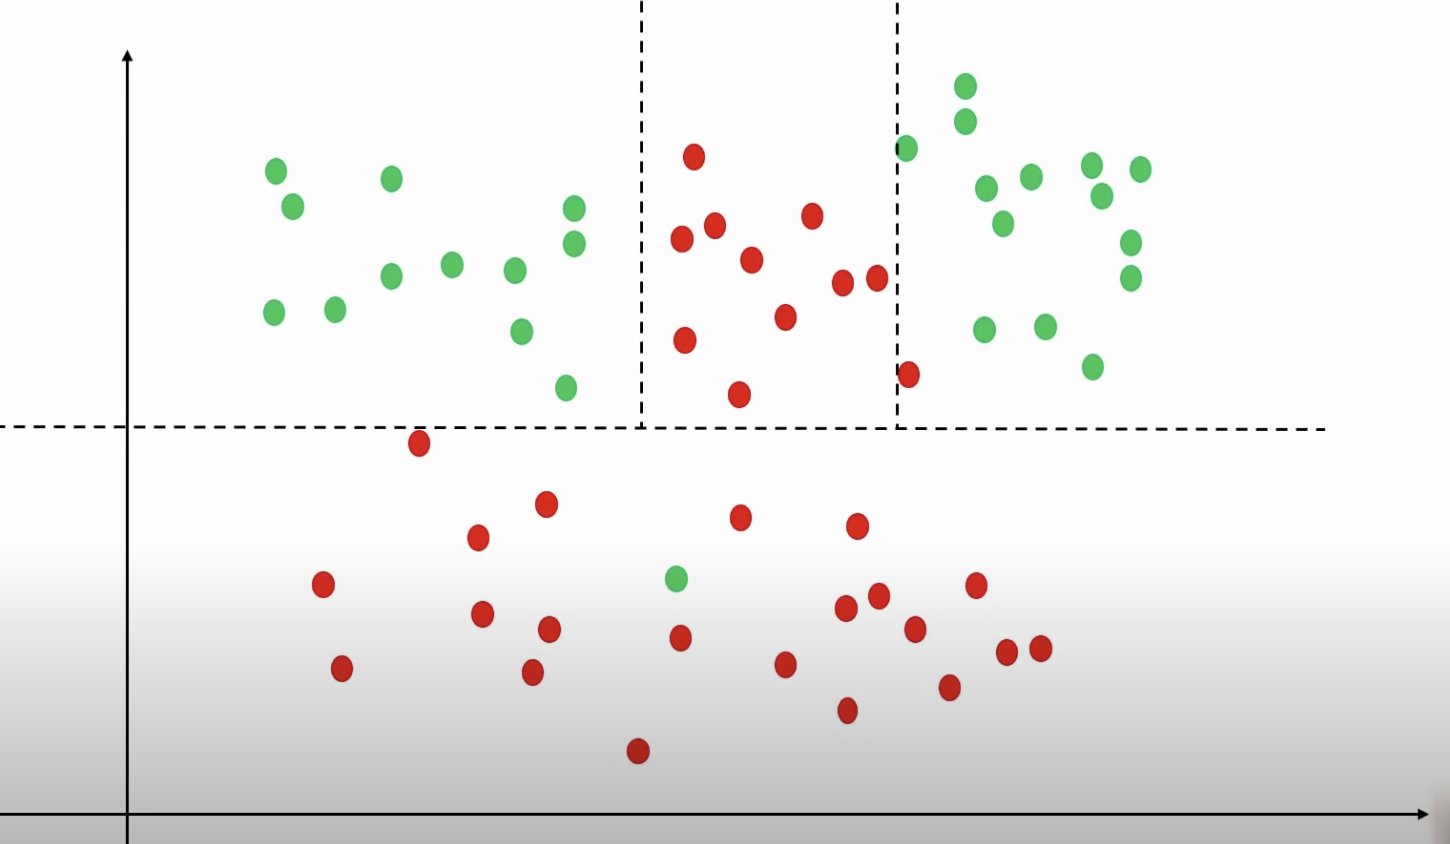

In [2]:
import pandas as pd
df = pd.read_csv('data/salaries.csv')
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


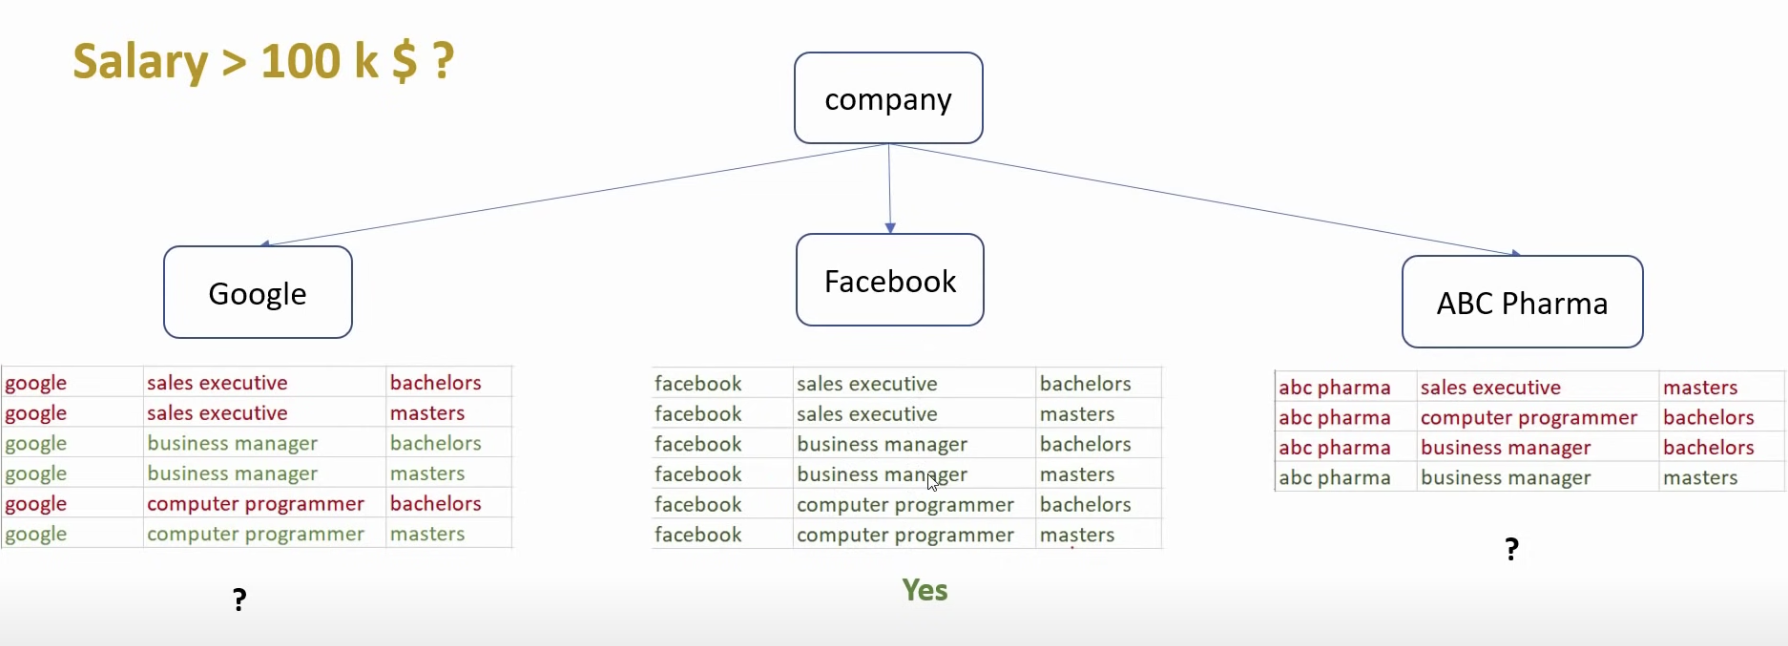

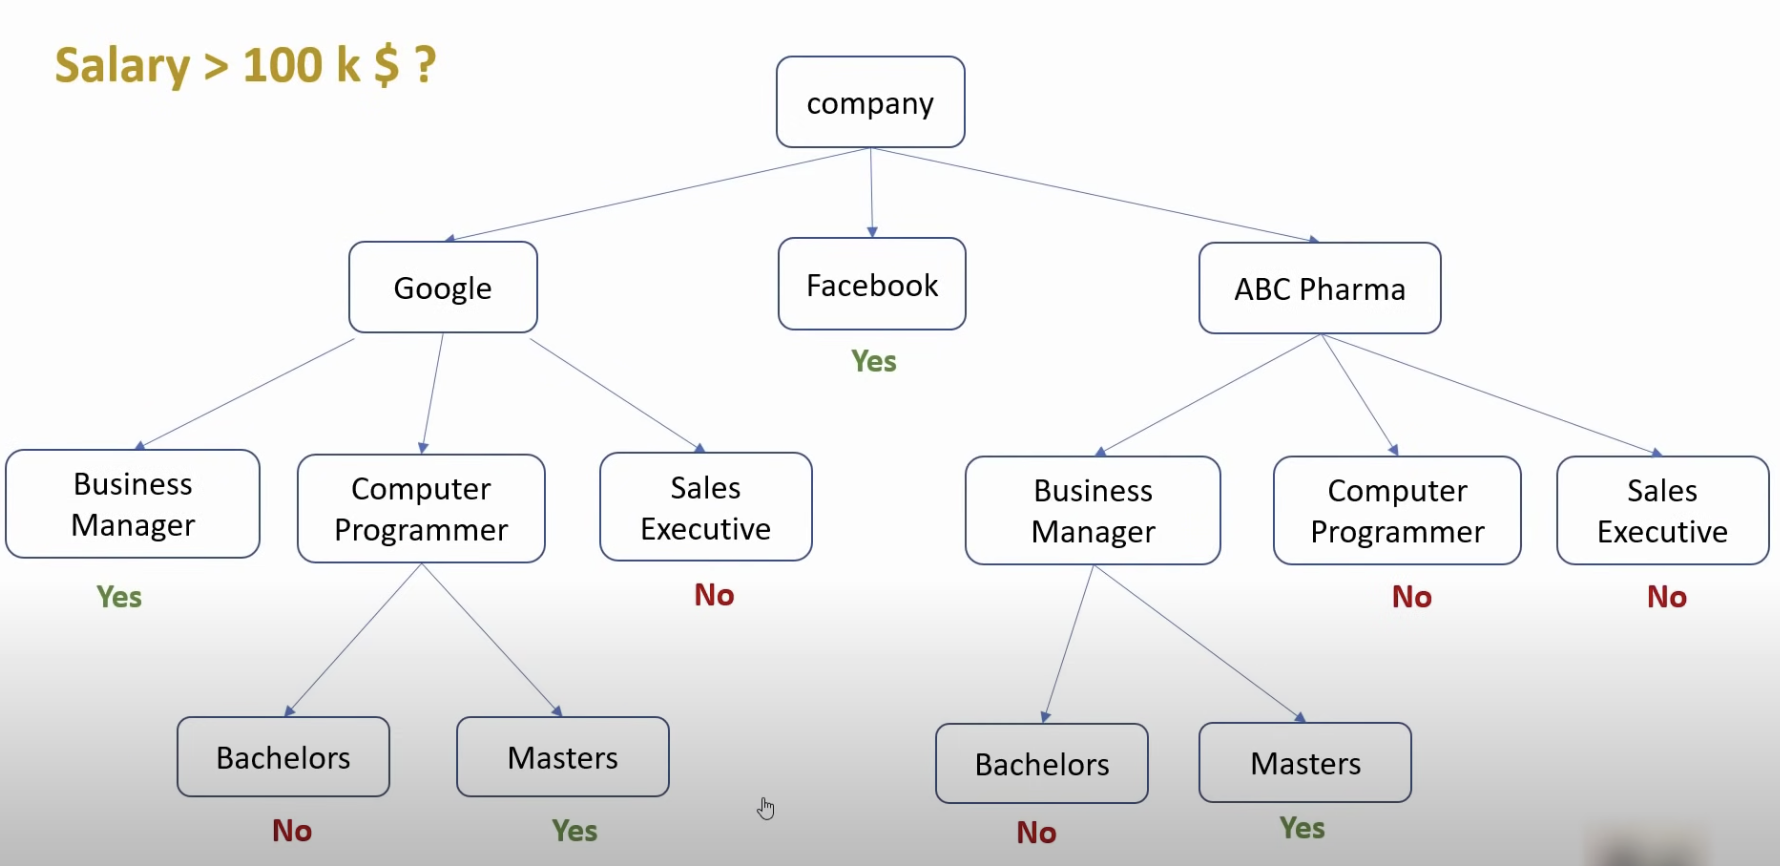

1. Normally in here we split by company -> job Title <br>
    But also we can split otherwise like jobTitle first next company etc <br>
    This impacts for the models performance need to check when working

In [3]:
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [5]:
inputs = df.drop('salary_more_then_100k', axis='columns')
inputs.head()

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors


In [6]:
target = df['salary_more_then_100k']
target.head()

0    0
1    0
2    1
3    1
4    0
Name: salary_more_then_100k, dtype: int64

Data preprocessing

In [8]:
from sklearn.preprocessing import LabelEncoder
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [10]:
inputs['company_n'] = le_company.fit_transform(inputs['company'])
inputs['job_n'] = le_job.fit_transform(inputs['job'])
inputs['degree_n'] = le_degree.fit_transform(inputs['degree'])
inputs.head()

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0


In [12]:
inputs_n = inputs.drop(['company','job','degree'],axis='columns')
inputs_n.head()

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0


Creating the model

In [13]:
from sklearn import tree

In [14]:
model = tree.DecisionTreeClassifier()

In [15]:
model.fit(inputs_n,target) 

DecisionTreeClassifier()

In [18]:
model.score(inputs_n,target)

1.0